In [1]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# Read Data
df = pd.read_excel("C:/Users/joshu/Documents/Winter 2025/Heart-Disease-Prediction/data/Patients_Data.xlsx")
df.head()

,PatientID,State,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,...,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,1,Alabama,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,...,Never used e-cigarettes in my entire life,1,"White only, Non-Hispanic",0,0,0,1,"No, did not receive any tetanus shot in the pa...",0,1
1,2,Alabama,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received Tdap",0,0
2,3,Alabama,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",1,0,0,0,"Yes, received tetanus shot but not sure what type",0,0
3,4,Alabama,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,...,Never used e-cigarettes in my entire life,0,"White only, Non-Hispanic",0,0,1,1,"Yes, received tetanus shot but not sure what type",0,0
4,5,Alabama,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,...,Never used e-cigarettes in my entire life,1,"Black only, Non-Hispanic",0,0,1,0,"No, did not receive any tetanus shot in the pa...",0,0


# Understand the Structure of the Data

In [4]:
print(df.shape)  # Check the shape of the dataset
print(df.info())  # Get an overview of the dataset

(237630, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237630 entries, 0 to 237629
Data columns (total 35 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   PatientID                  237630 non-null  int64  
 1   State                      237630 non-null  object 
 2   Sex                        237630 non-null  object 
 3   GeneralHealth              237630 non-null  object 
 4   AgeCategory                237630 non-null  object 
 5   HeightInMeters             237630 non-null  float64
 6   WeightInKilograms          237630 non-null  float64
 7   BMI                        237630 non-null  float64
 8   HadHeartAttack             237630 non-null  int64  
 9   HadAngina                  237630 non-null  int64  
 10  HadStroke                  237630 non-null  int64  
 11  HadAsthma                  237630 non-null  int64  
 12  HadSkinCancer              237630 non-null  int64  
 13  HadCOPD         

In [5]:
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,PatientID,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,...,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,HighRiskLastYear,CovidPos
count,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,...,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000,237630.000000
mean,118815.500000,1.704990,83.667908,28.691602,0.055553,0.061512,0.041779,0.148517,0.085225,0.078281,...,0.148933,0.034524,0.067567,0.426941,0.545285,0.342697,0.531907,0.407125,0.042823,0.295939
std,68598.016571,0.106776,21.360982,6.528065,0.229056,0.240267,0.200085,0.355612,0.279217,0.268614,...,0.356023,0.182572,0.251002,0.494635,0.497946,0.474612,0.498982,0.491299,0.202458,0.456465
min,1.000000,0.910000,28.120001,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59408.250000,1.630000,68.040001,24.280001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,118815.500000,1.700000,81.650002,27.459999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,178222.750000,1.780000,95.250000,31.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,237630.000000,2.410000,292.570007,97.650002,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Check for missing values
df.isnull().sum()

PatientID                    0
State                        0
Sex                          0
GeneralHealth                0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI                          0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AlcoholDrinkers              0
HIVTesting                   0
FluVaxLast12                 0
PneumoVaxEver                0
TetanusL

# Exploratory Data Analysis

**Target Variable Analysis**

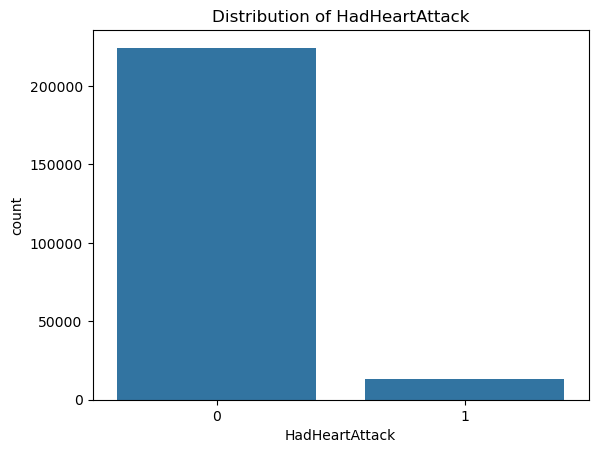

HadHeartAttack
0    94.444725
1     5.555275
Name: proportion, dtype: float64


In [7]:
# Distribution of the target variable
sns.countplot(x='HadHeartAttack', data=df)
plt.title('Distribution of HadHeartAttack')
plt.show()

# Percentage of patients with and without heart attack
print(df['HadHeartAttack'].value_counts(normalize=True) * 100)

**Univariate Analysis**

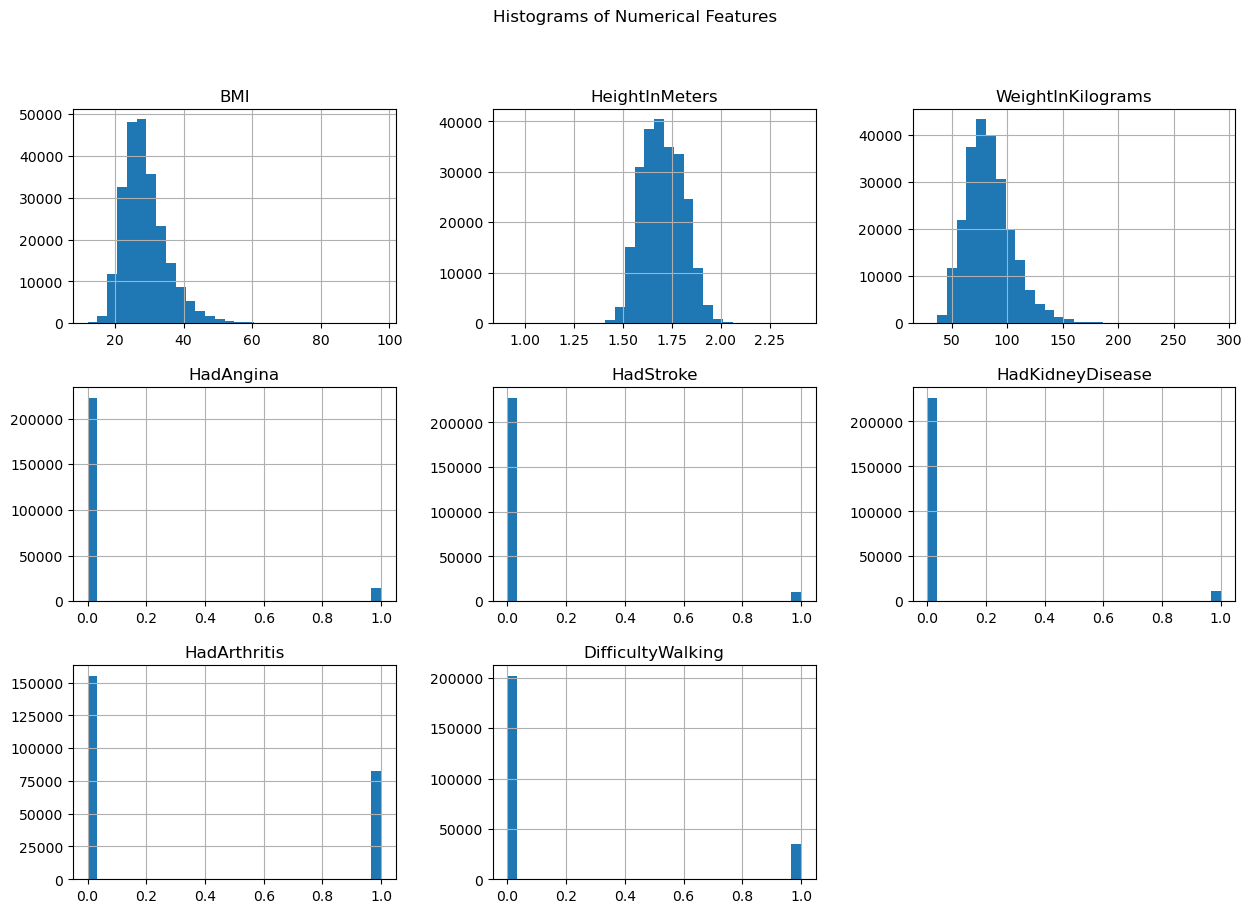

In [8]:
numerical_features = [
    'BMI', 'HeightInMeters', 'WeightInKilograms', 'HadAngina', 
    'HadStroke', 'HadKidneyDisease', 'HadArthritis', 'DifficultyWalking'
]

# Plot histograms for numerical features
df[numerical_features].hist(figsize=(15, 10), bins=30)
plt.suptitle('Histograms of Numerical Features')
plt.show()

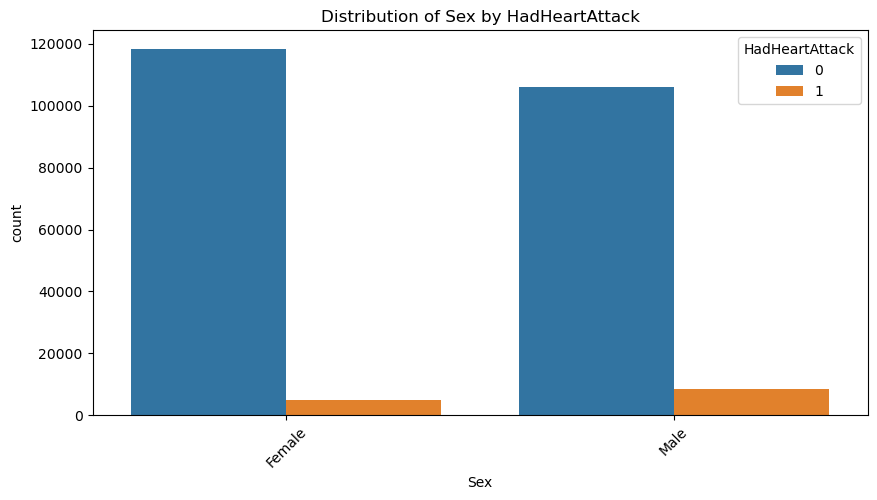

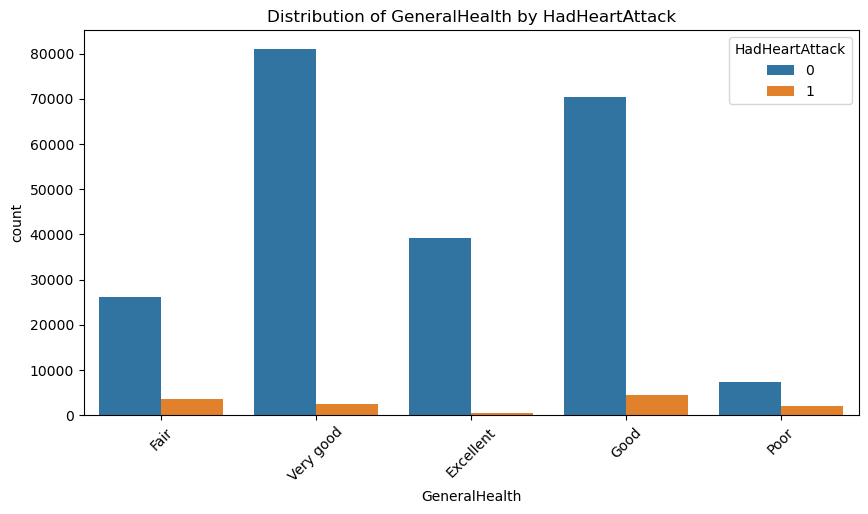

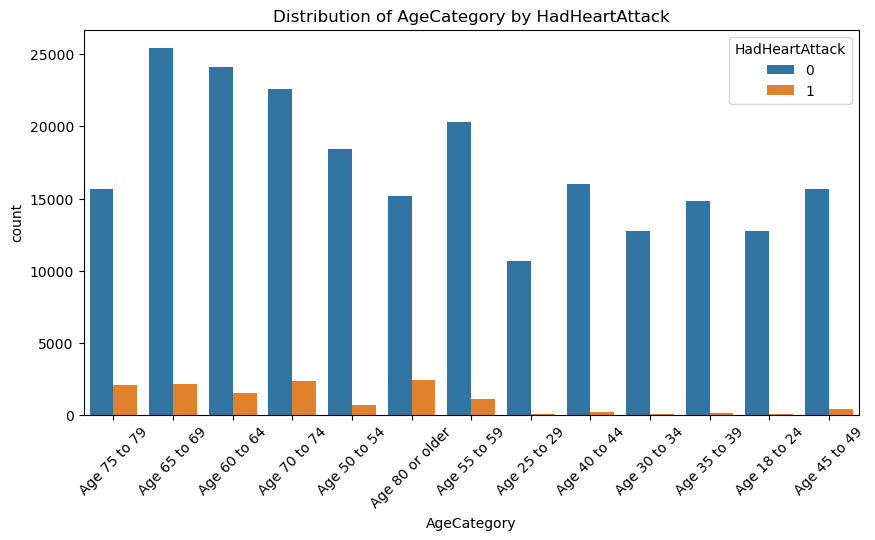

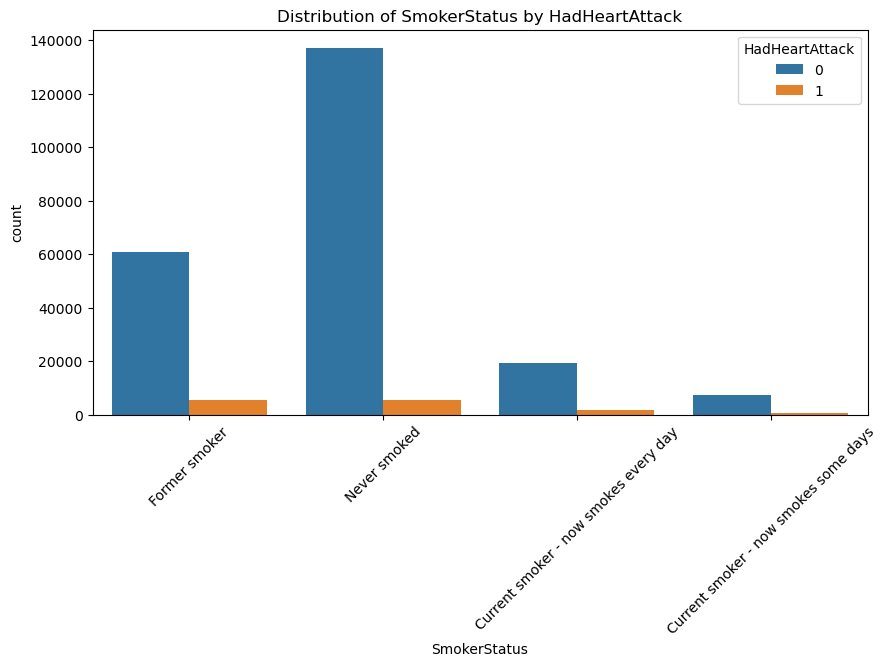

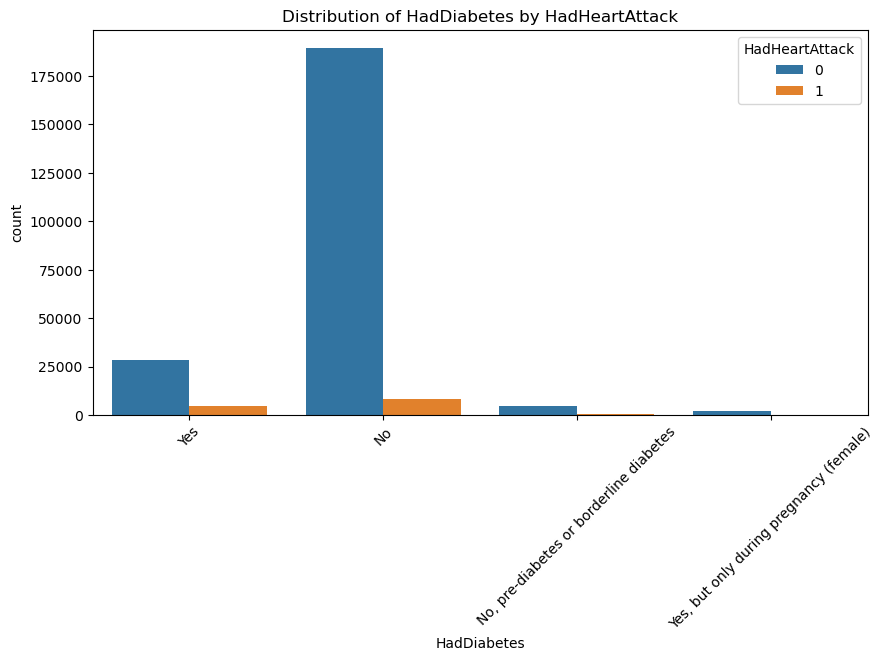

In [9]:
categorical_features = ['Sex', 'GeneralHealth', 'AgeCategory', 'SmokerStatus', 'HadDiabetes']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=df, hue='HadHeartAttack')
    plt.title(f'Distribution of {feature} by HadHeartAttack')
    plt.xticks(rotation=45)
    plt.show()

**Bivariate Analysis**

**Numerical Features vs Target**

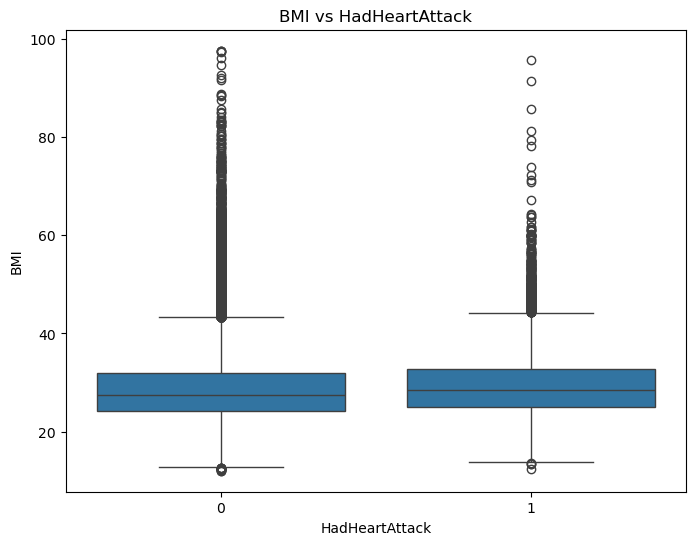

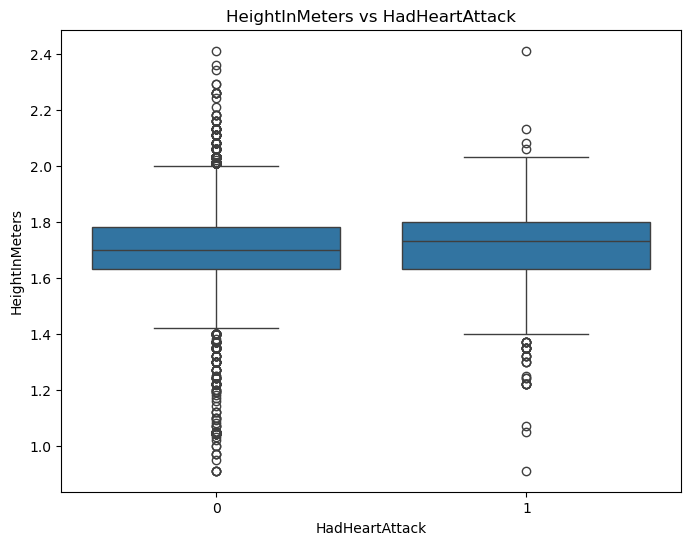

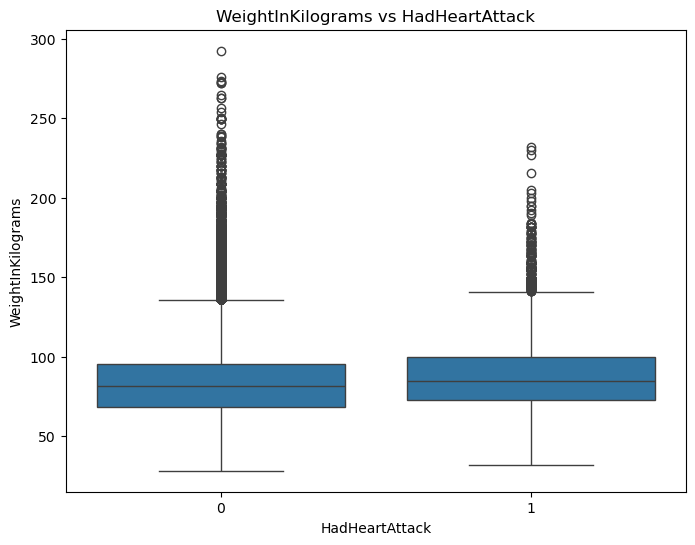

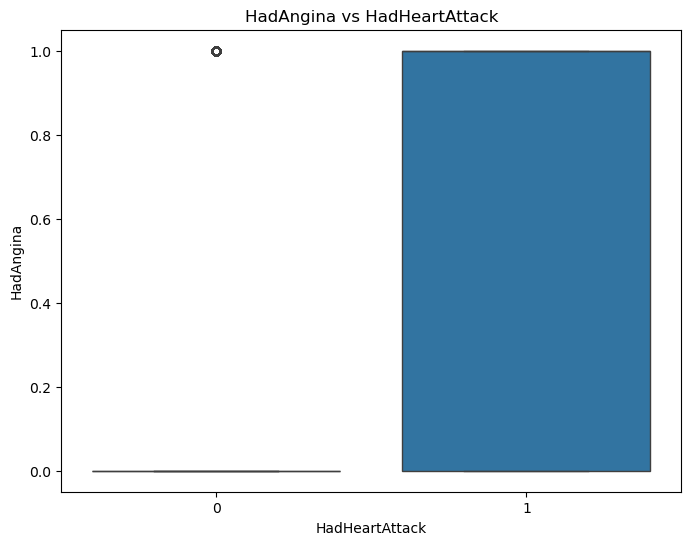

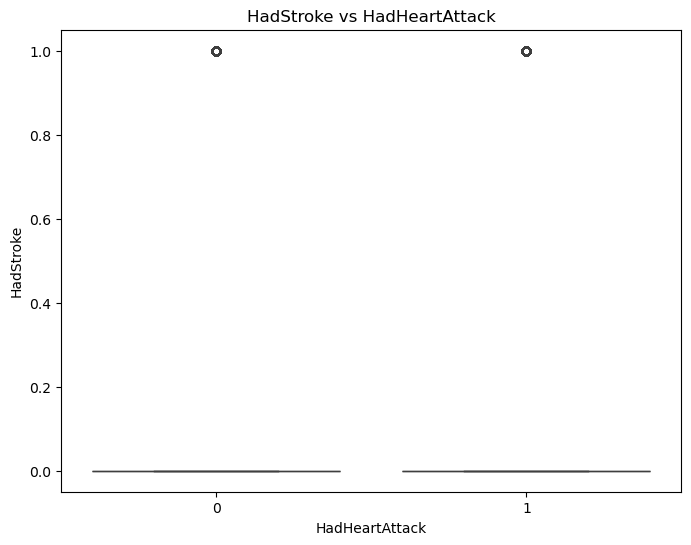

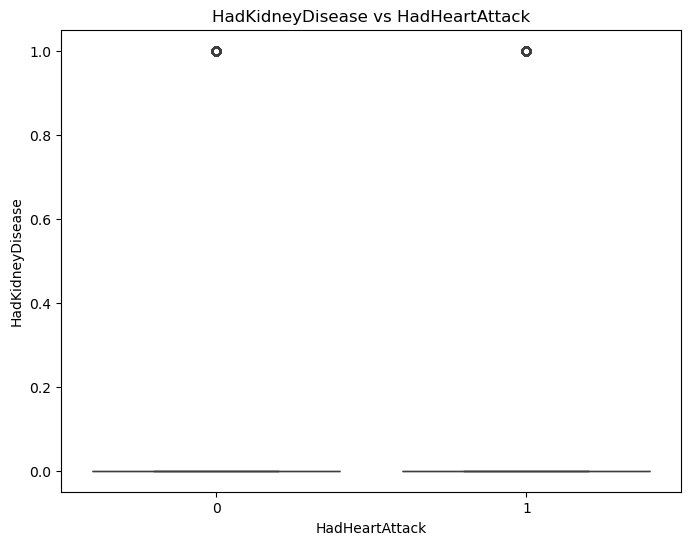

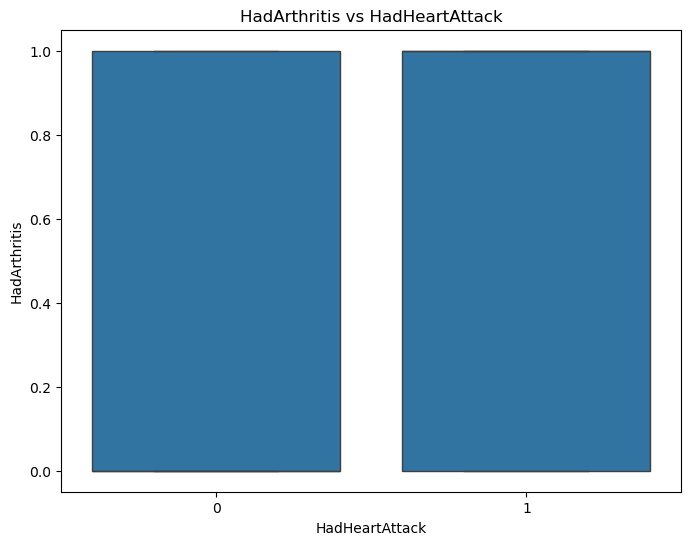

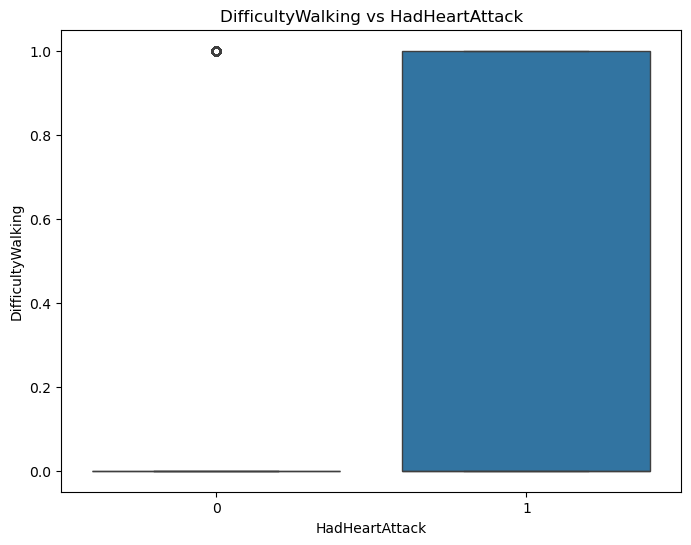

In [10]:
# Box plots for numerical features vs target
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='HadHeartAttack', y=feature, data=df)
    plt.title(f'{feature} vs HadHeartAttack')
    plt.show()

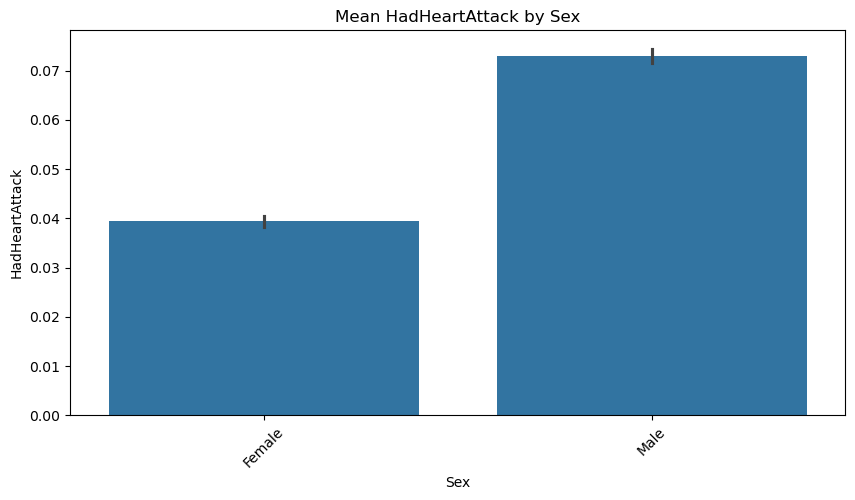

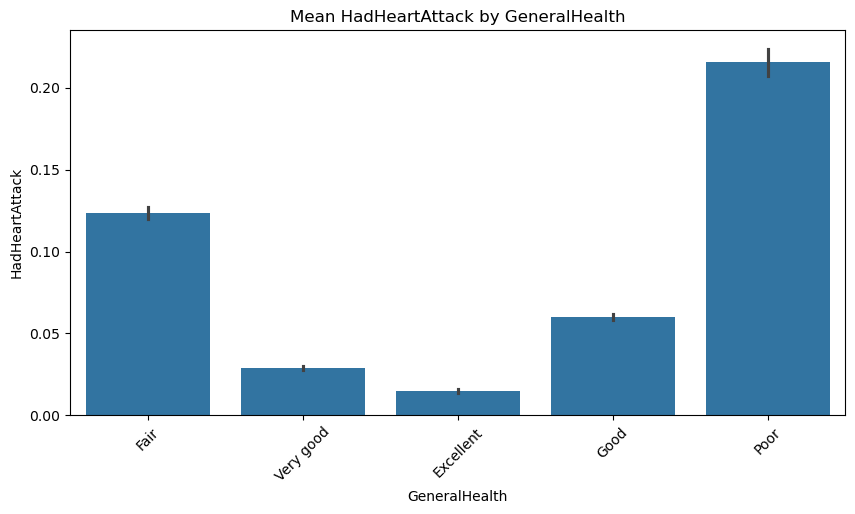

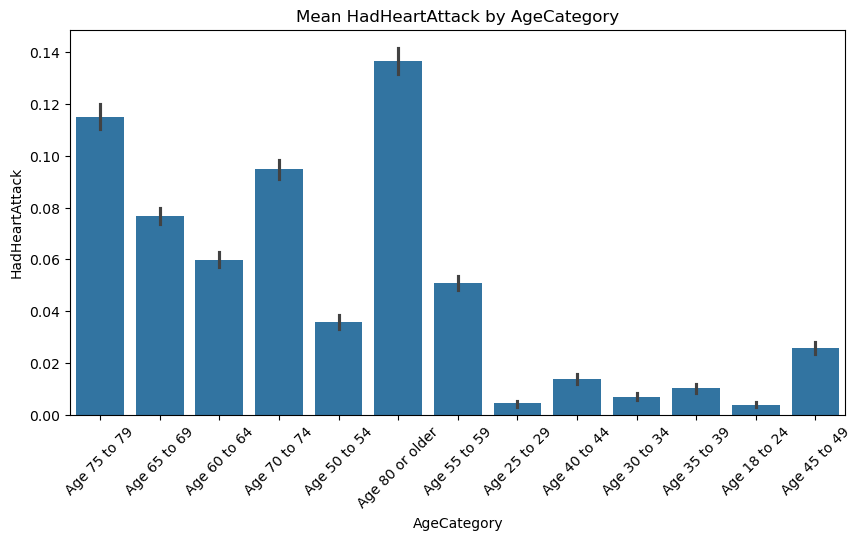

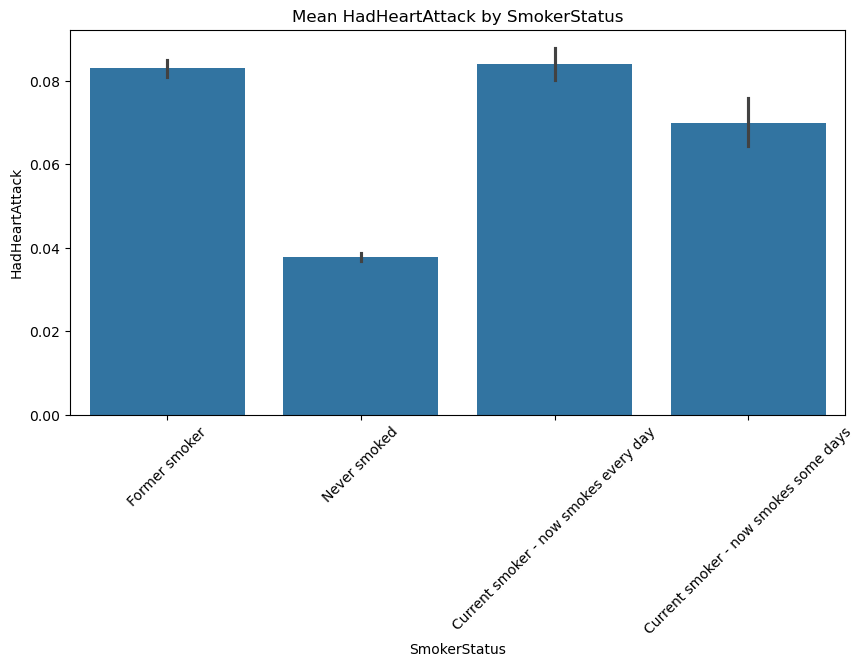

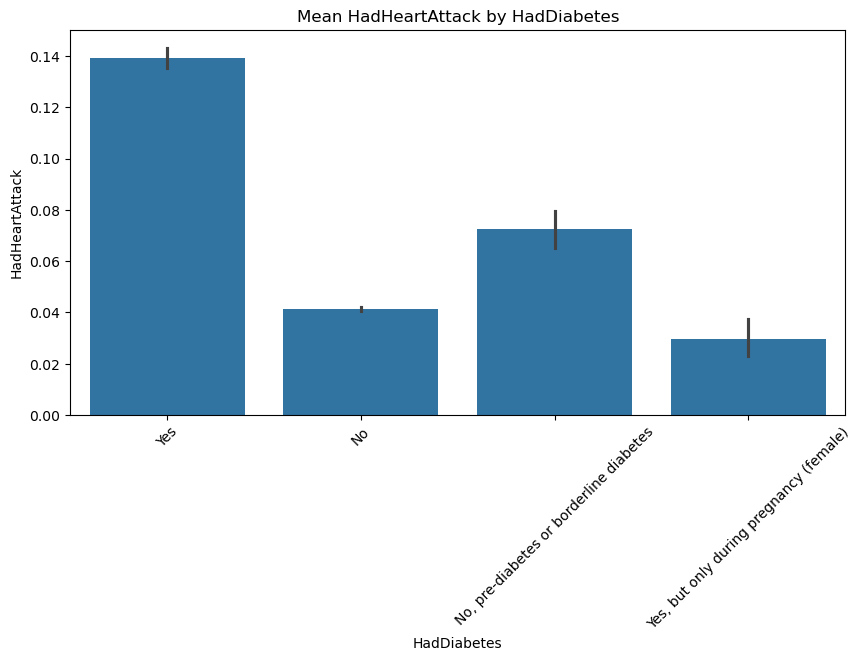

In [11]:
# Grouped bar plots for categorical features vs target
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=feature, y='HadHeartAttack', data=df, estimator=np.mean)
    plt.title(f'Mean HadHeartAttack by {feature}')
    plt.xticks(rotation=45)
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

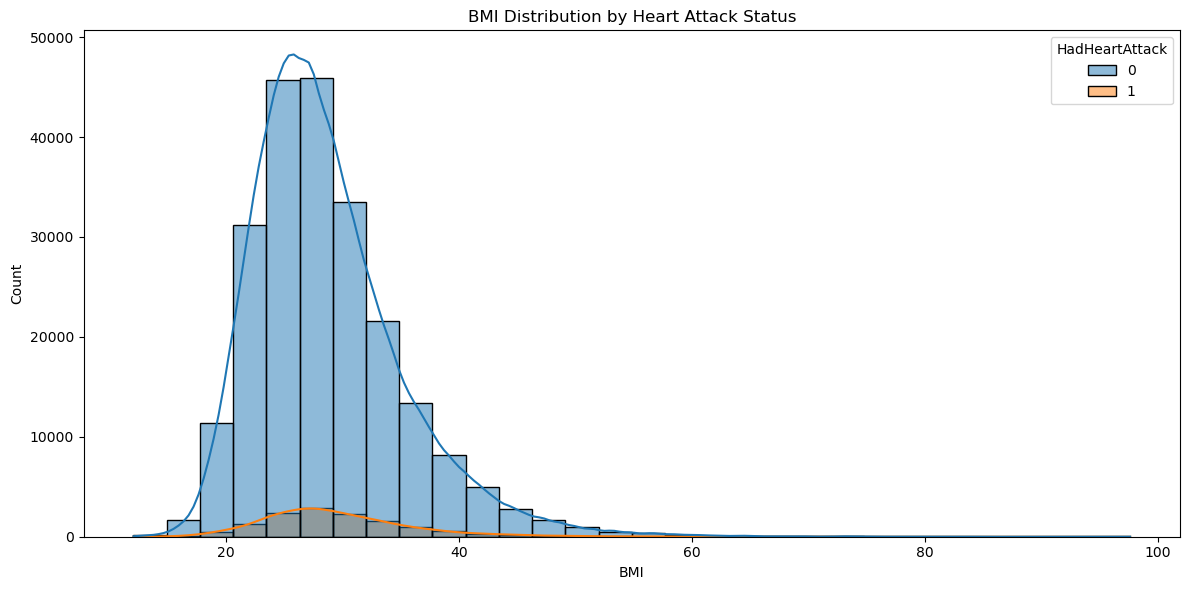

In [12]:
# BMI Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='BMI', hue='HadHeartAttack', kde=True, bins=30)
plt.title('BMI Distribution by Heart Attack Status')
plt.xlabel('BMI')
plt.tight_layout()
plt.show

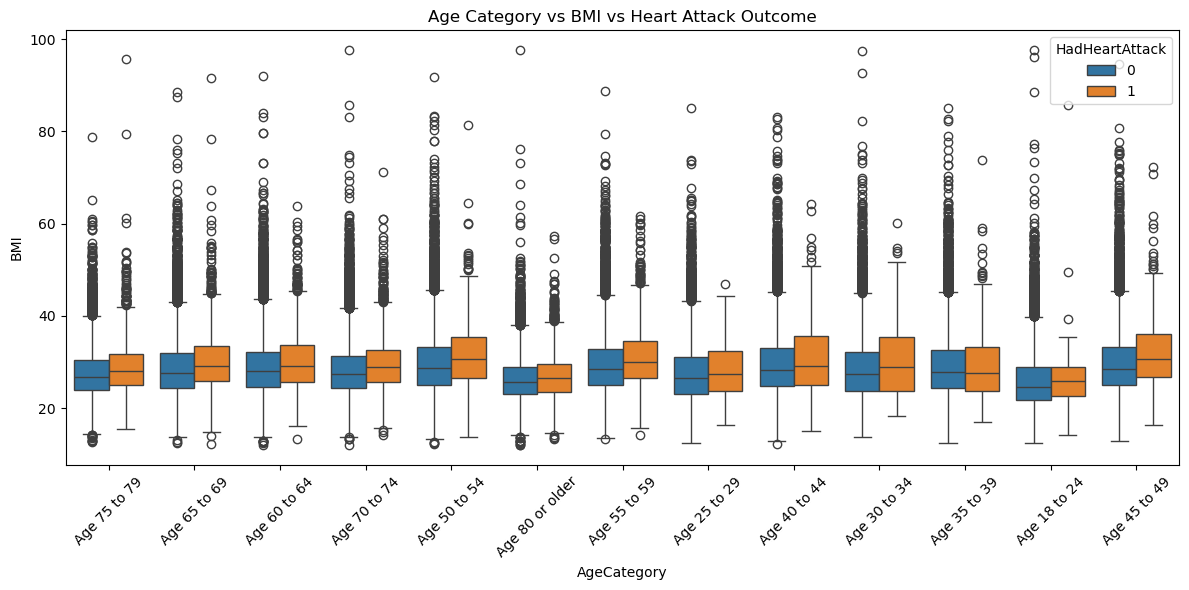

In [13]:
# Example: Visualizing interactions between AgeCategory, BMI, and HadHeartAttack
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeCategory', y='BMI', hue='HadHeartAttack', data=df)
plt.title("Age Category vs BMI vs Heart Attack Outcome")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Analysis

In [14]:
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols

['State',
 'Sex',
 'GeneralHealth',
 'AgeCategory',
 'HadDiabetes',
 'SmokerStatus',
 'ECigaretteUsage',
 'RaceEthnicityCategory',
 'TetanusLast10Tdap']

In [15]:
# Check unique values for each categorical column
for col in cat_cols:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("\n")

Unique values in column 'State':
['Alabama' 'Alaska' 'Arizona' 'California' 'Arkansas' 'Connecticut'
 'Colorado' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Indiana'
 'District of Columbia' 'Kansas' 'Iowa' 'Maryland' 'Minnesota' 'Montana'
 'New Jersey' 'Nebraska' 'New York' 'Ohio' 'Oklahoma' 'Texas' 'Vermont'
 'Washington' 'Utah' 'Illinois' 'West Virginia' 'Virginia' 'Massachusetts'
 'Kentucky' 'Louisiana' 'Maine' 'Wisconsin' 'Michigan' 'Mississippi'
 'Missouri' 'Nevada' 'New Hampshire' 'New Mexico' 'South Carolina'
 'North Carolina' 'North Dakota' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Dakota' 'Tennessee' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']


Unique values in column 'Sex':
['Female' 'Male']


Unique values in column 'GeneralHealth':
['Fair' 'Very good' 'Excellent' 'Good' 'Poor']


Unique values in column 'AgeCategory':
['Age 75 to 79' 'Age 65 to 69' 'Age 60 to 64' 'Age 70 to 74'
 'Age 50 to 54' 'Age 80 or older' 'Age 55 to 59' 'Age 25 to 29'
 'Age 40 to 44' 

In [16]:
# Correct mapping for HadDiabetes - maintaining meaningful categories
df['HadDiabetes'] = df['HadDiabetes'].map({
    'Yes': 'Yes',                                       
    'No': 'No',                                         
    'No, pre-diabetes or borderline diabetes': 'No', 
    'Yes, but only during pregnancy (female)': 'No'  
})

In [17]:
# Correct mapping for TetanusLast10Tdap - making it a Yes/No variable
df['TetanusLast10Tdap'] = df['TetanusLast10Tdap'].map({
    'No, did not receive any tetanus shot in the past 10 years': 'No',  
    'Yes, received Tdap': 'Yes',                                     
    'Yes, received tetanus shot but not sure what type': 'Yes',     
    'Yes, received tetanus shot, but not Tdap': 'Yes'             
})

In [18]:
# Simplify SmokerStatus - this mapping looks good as is
df['SmokerStatus'] = df['SmokerStatus'].map({
    'Never smoked': 'Never',
    'Former smoker': 'Former',
    'Current smoker - now smokes every day': 'Daily',
    'Current smoker - now smokes some days': 'Occasional'
})

# Simplify ECigaretteUsage - corrected mapping
df['ECigaretteUsage'] = df['ECigaretteUsage'].map({
    'Never used e-cigarettes in my entire life': 'Never',
    'Not at all (right now)': 'Never',           # Changed from 'Former' to 'Never'
    'Use them some days': 'Occasional',
    'Use them every day': 'Daily'
})

In [19]:
# Check unique values for each categorical column
for col in cat_cols:
    print(f"Unique values in column '{col}':")
    print(df[col].unique())
    print("\n")
    

Unique values in column 'State':
['Alabama' 'Alaska' 'Arizona' 'California' 'Arkansas' 'Connecticut'
 'Colorado' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Indiana'
 'District of Columbia' 'Kansas' 'Iowa' 'Maryland' 'Minnesota' 'Montana'
 'New Jersey' 'Nebraska' 'New York' 'Ohio' 'Oklahoma' 'Texas' 'Vermont'
 'Washington' 'Utah' 'Illinois' 'West Virginia' 'Virginia' 'Massachusetts'
 'Kentucky' 'Louisiana' 'Maine' 'Wisconsin' 'Michigan' 'Mississippi'
 'Missouri' 'Nevada' 'New Hampshire' 'New Mexico' 'South Carolina'
 'North Carolina' 'North Dakota' 'Oregon' 'Pennsylvania' 'Rhode Island'
 'South Dakota' 'Tennessee' 'Wyoming' 'Guam' 'Puerto Rico'
 'Virgin Islands']


Unique values in column 'Sex':
['Female' 'Male']


Unique values in column 'GeneralHealth':
['Fair' 'Very good' 'Excellent' 'Good' 'Poor']


Unique values in column 'AgeCategory':
['Age 75 to 79' 'Age 65 to 69' 'Age 60 to 64' 'Age 70 to 74'
 'Age 50 to 54' 'Age 80 or older' 'Age 55 to 59' 'Age 25 to 29'
 'Age 40 to 44' 

In [20]:
int_cols = df.select_dtypes(['int64']).columns.tolist()
int_cols

['PatientID',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'ChestScan',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'HighRiskLastYear',
 'CovidPos']

In [21]:
float_cols = df.select_dtypes(['float64']).columns.tolist()
float_cols

['HeightInMeters', 'WeightInKilograms', 'BMI']

In [22]:
# Spliting target variable and independent variables
df = df.drop(['PatientID', 'RaceEthnicityCategory', 'State'], axis = 1)

In [23]:
df.head()

,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,SmokerStatus,ECigaretteUsage,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Fair,Age 75 to 79,1.63,84.820000,32.099998,0,1,0,1,...,Former,Never,1,0,0,0,1,No,0,1
1,Female,Very good,Age 65 to 69,1.60,71.669998,27.990000,0,0,0,0,...,Former,Never,0,0,0,1,1,Yes,0,0
2,Male,Excellent,Age 60 to 64,1.78,71.209999,22.530001,0,0,0,0,...,Never,Never,0,1,0,0,0,Yes,0,0
3,Male,Very good,Age 70 to 74,1.78,95.250000,30.129999,0,0,0,0,...,Former,Never,0,0,0,1,1,Yes,0,0
4,Female,Good,Age 50 to 54,1.68,78.019997,27.760000,0,0,0,0,...,Never,Never,1,0,0,1,0,No,0,0


In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['GeneralHealth'] = le.fit_transform(df['GeneralHealth'])
df['AgeCategory'] = le.fit_transform(df['AgeCategory'])
df['HadDiabetes'] = le.fit_transform(df['HadDiabetes'])
df['SmokerStatus'] = le.fit_transform(df['SmokerStatus'])
df['ECigaretteUsage'] = le.fit_transform(df['ECigaretteUsage'])
df['TetanusLast10Tdap'] = le.fit_transform(df['TetanusLast10Tdap'])
df.head()

,Sex,GeneralHealth,AgeCategory,HeightInMeters,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,SmokerStatus,ECigaretteUsage,ChestScan,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,1,11,1.63,84.820000,32.099998,0,1,0,1,...,1,1,1,0,0,0,1,0,0,1
1,0,4,9,1.60,71.669998,27.990000,0,0,0,0,...,1,1,0,0,0,1,1,1,0,0
2,1,0,8,1.78,71.209999,22.530001,0,0,0,0,...,2,1,0,1,0,0,0,1,0,0
3,1,4,10,1.78,95.250000,30.129999,0,0,0,0,...,1,1,0,0,0,1,1,1,0,0
4,0,2,6,1.68,78.019997,27.760000,0,0,0,0,...,2,1,1,0,0,1,0,0,0,0


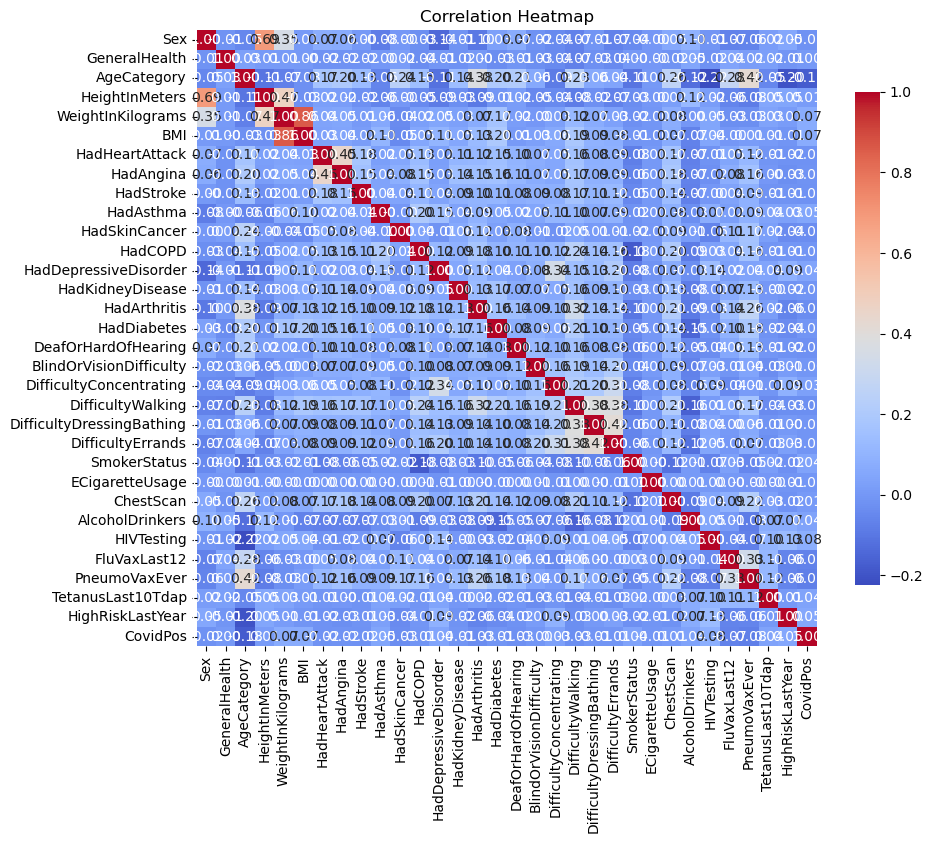

In [25]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap')
plt.show()

In [26]:
# Print correlations with 'Outcome' column
print("Correlation with HadHeartAttack:")
print(corr_matrix['HadHeartAttack'].sort_values(ascending=False))

Correlation with HadHeartAttack:
HadHeartAttack               1.000000
HadAngina                    0.446480
HadStroke                    0.177718
AgeCategory                  0.172569
ChestScan                    0.168255
DifficultyWalking            0.159348
HadDiabetes                  0.146460
HadCOPD                      0.133071
PneumoVaxEver                0.120133
HadArthritis                 0.118072
HadKidneyDisease             0.109800
DeafOrHardOfHearing          0.098196
DifficultyErrands            0.089521
DifficultyDressingBathing    0.082843
Sex                          0.073293
BlindOrVisionDifficulty      0.073039
DifficultyConcentrating      0.051840
HadSkinCancer                0.049543
FluVaxLast12                 0.046403
WeightInKilograms            0.038411
BMI                          0.030210
HadAsthma                    0.024252
HadDepressiveDisorder        0.023982
HeightInMeters               0.023305
ECigaretteUsage              0.002534
TetanusLast10Tdap

In [27]:
# Columns to drop absolute value < 0.05
columns_to_drop = [
    'ECigaretteUsage', 'TetanusLast10Tdap', 'HIVTesting', 'CovidPos', 
    'HighRiskLastYear', 'GeneralHealth', 'HadAsthma', 'HadDepressiveDisorder', 
    'HeightInMeters', 'HadSkinCancer', 'FluVaxLast12', 'DifficultyConcentrating'
]

# Drop the columns
df = df.drop(columns=columns_to_drop)

# Verify the remaining columns
print(df.columns)

Index(['Sex', 'AgeCategory', 'WeightInKilograms', 'BMI', 'HadHeartAttack',
       'HadAngina', 'HadStroke', 'HadCOPD', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands',
       'SmokerStatus', 'ChestScan', 'AlcoholDrinkers', 'PneumoVaxEver'],
      dtype='object')


In [28]:
df.head()

,Sex,AgeCategory,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ChestScan,AlcoholDrinkers,PneumoVaxEver
0,0,11,84.820000,32.099998,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1
1,0,9,71.669998,27.990000,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,8,71.209999,22.530001,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
3,1,10,95.250000,30.129999,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
4,0,6,78.019997,27.760000,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0


In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['WeightInKilograms'] = scaler.fit_transform(df[['WeightInKilograms']])
df['BMI'] = scaler.fit_transform(df[['BMI']])
df.head()

,Sex,AgeCategory,WeightInKilograms,BMI,HadHeartAttack,HadAngina,HadStroke,HadCOPD,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ChestScan,AlcoholDrinkers,PneumoVaxEver
0,0,11,0.053935,0.522115,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,1
1,0,9,-0.561675,-0.107475,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,8,-0.583210,-0.943865,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
3,1,10,0.542209,0.220341,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1
4,0,6,-0.264404,-0.142707,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0


In [57]:
# Save DataFrame to CSV
df.to_csv('processed.csv', index=False)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Separate features (X) and target (y)
X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

# balance y
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

value_count = y.value_counts()
print(value_count)

HadHeartAttack
0    224429
1    224429
Name: count, dtype: int64


In [31]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardised the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score


In [33]:
def compare_models_train_test():
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
    
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3, metric='euclidean'),
        'Naive Bayes': GaussianNB(),
        'Random Forest': RandomForestClassifier(random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42)
    }

    results = {}

    # Iterate over both the name and model
    for model_name, model in models.items():
        print(f"\n===== {model_name} =====")
        
        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred) * 100
        precision = precision_score(y_test, y_pred) * 100
        recall = recall_score(y_test, y_pred) * 100
        f1 = f1_score(y_test, y_pred) * 100

        # Store results
        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1
        }

        # Print basic metrics
        print(f'Accuracy Score: {accuracy:.2f}%')
        print(f'Precision: {precision:.2f}%')
        print(f'Recall: {recall:.2f}%')
        print(f'F1 Score: {f1:.2f}%')
        
        # Print classification report
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))
        
        print('=' * 50)

    return results

In [34]:
# Call the function
results_dict = compare_models_train_test()


===== Logistic Regression =====
Accuracy Score: 77.29%
Precision: 79.32%
Recall: 73.79%
F1 Score: 76.46%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78     44915
           1       0.79      0.74      0.76     44857

    accuracy                           0.77     89772
   macro avg       0.77      0.77      0.77     89772
weighted avg       0.77      0.77      0.77     89772


===== K-Nearest Neighbors =====
Accuracy Score: 88.27%
Precision: 84.36%
Recall: 93.95%
F1 Score: 88.90%

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88     44915
           1       0.84      0.94      0.89     44857

    accuracy                           0.88     89772
   macro avg       0.89      0.88      0.88     89772
weighted avg       0.89      0.88      0.88     89772


===== Naive Bayes =====
Accuracy Score: 73.96%
Precision: 77.60%
Recall: 67.31%
F1 Sc

## Hyperparameter Tuning

In [38]:
def compare_models_with_tuning():
    # Define models with initial parameters
    models = {
        'Logistic Regression': {
            'model': LogisticRegression(random_state=42),
            'params': {
                'C': [0.01, 0.1, 1, 10, 100],
                'max_iter': [1000],
                'solver': ['liblinear', 'saga']
            }
        },
        'K-Nearest Neighbors': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'metric': ['euclidean', 'manhattan']
            }
        },
        'Naive Bayes': {
            'model': GaussianNB(),
            'params': {
                'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
            }
        },
        'Random Forest': {
            'model': RandomForestClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'max_depth': [None, 10, 20],
                'min_samples_split': [2, 5]
            }
        },
        'Gradient Boosting': {
            'model': GradientBoostingClassifier(random_state=42),
            'params': {
                'n_estimators': [100, 200],
                'learning_rate': [0.01, 0.1],
                'max_depth': [3, 5]
            }
        }
    }

    results = {}

    # Iterate through each model
    for model_name, model_info in models.items():
        print(f"\n===== {model_name} =====")
        
        # Create GridSearchCV
        grid_search = GridSearchCV(
            model_info['model'],
            model_info['params'],
            cv=5,
            scoring='f1',
            n_jobs=-1
        )
        
        # Fit the grid search
        print(f"Performing hyperparameter tuning...")
        grid_search.fit(X_train, y_train)
        
        # Get best model and parameters
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        
        # Evaluate the best model
        y_pred = best_model.predict(X_test)
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred) * 100
        precision = precision_score(y_test, y_pred) * 100
        recall = recall_score(y_test, y_pred) * 100
        f1 = f1_score(y_test, y_pred) * 100
        
        # Store results
        results[model_name] = {
            'Best_Model': best_model,
            'Best_Params': best_params,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1
        }
        
        # Print results
        print(f"\nBest Parameters: {best_params}")
        print(f"Best Cross-Validation F1 Score: {grid_search.best_score_:.4f}")
        print(f"\nTest Set Performance:")
        print(f"Accuracy Score: {accuracy:.2f}%")
        print(f"Precision: {precision:.2f}%")
        print(f"Recall: {recall:.2f}%")
        print(f"F1 Score: {f1:.2f}%")
        
        # Print classification report
        print('\nClassification Report:')
        print(classification_report(y_test, y_pred))
        
        print('=' * 50)
    
    # Find best model based on F1 score
    best_model_name = max(results, key=lambda x: results[x]['F1_Score'])
    print(f"\nBest Model: {best_model_name}")
    print(f"F1 Score: {results[best_model_name]['F1_Score']:.2f}%")
    print(f"Parameters: {results[best_model_name]['Best_Params']}")
    
    return results

In [39]:
tuned_results = compare_models_with_tuning()


===== Logistic Regression =====
Performing hyperparameter tuning...

Best Parameters: {'C': 0.01, 'max_iter': 1000, 'solver': 'saga'}
Best Cross-Validation F1 Score: 0.7660

Test Set Performance:
Accuracy Score: 77.28%
Precision: 79.32%
Recall: 73.78%
F1 Score: 76.45%

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.78     44915
           1       0.79      0.74      0.76     44857

    accuracy                           0.77     89772
   macro avg       0.77      0.77      0.77     89772
weighted avg       0.77      0.77      0.77     89772


===== K-Nearest Neighbors =====
Performing hyperparameter tuning...

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best Cross-Validation F1 Score: 0.8937

Test Set Performance:
Accuracy Score: 89.49%
Precision: 85.86%
Recall: 94.54%
F1 Score: 89.99%

Classification Report:
              precision    recall  f1-score   support

           0 

In [58]:
import joblib

# Save Random Forest model
rf_model = tuned_results['Random Forest']['Best_Model']
joblib.dump(rf_model, 'random_forest_heart_disease_model.pkl')
print("Random Forest model saved as 'random_forest_heart_disease_model.pkl'")

Random Forest model saved as 'random_forest_heart_disease_model.pkl'


In [59]:
# Save Gradient Boosting model
gb_model = tuned_results['Gradient Boosting']['Best_Model']
joblib.dump(gb_model, 'gradient_boosting_heart_disease_model.pkl')
print("Gradient Boosting model saved as 'gradient_boosting_heart_disease_model.pkl'")

Gradient Boosting model saved as 'gradient_boosting_heart_disease_model.pkl'


# Stacking

In [44]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import numpy as np

# Get the best models from previous results
rf_model = tuned_results['Random Forest']['Best_Model']
gb_model = tuned_results['Gradient Boosting']['Best_Model']
knn_model = tuned_results['K-Nearest Neighbors']['Best_Model']

# Define the base estimators for stacking
estimators = [
    ('rf', rf_model),
    ('gb', gb_model),
    ('knn', knn_model)
]

# Creating the stacking classifier with logistic regression as the final estimator
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(max_iter=1000),
    cv=3,
    stack_method='predict'
)

# Train the stacking model
stack_model.fit(X_train, y_train)

# Evaluate the stacking model
y_pred_stack = stack_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_stack) * 100
precision = precision_score(y_test, y_pred_stack) * 100
recall = recall_score(y_test, y_pred_stack) * 100
f1 = f1_score(y_test, y_pred_stack) * 100

# Print results
print("\n===== Stacking Model =====")
print(f"Accuracy Score: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Print classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred_stack))


===== Stacking Model =====
Accuracy Score: 92.54%
Precision: 90.74%
Recall: 94.73%
F1 Score: 92.69%

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     44915
           1       0.91      0.95      0.93     44857

    accuracy                           0.93     89772
   macro avg       0.93      0.93      0.93     89772
weighted avg       0.93      0.93      0.93     89772



In [45]:
# Save the stacking model
import joblib
joblib.dump(stack_model, 'stacking_heart_disease_model.pkl')
print("Stacking model saved as 'stacking_heart_disease_model.pkl'")

Stacking model saved as 'stacking_heart_disease_model.pkl'


# ANN

In [53]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential([
    # Input layer with more neurons
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    
    # First hidden layer
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    # Second hidden layer
    keras.layers.Dense(8, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    
    # Output layer
    keras.layers.Dense(1, activation='sigmoid')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                640       
                                                                 
 batch_normalization_6 (Batc  (None, 32)               128       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_7 (Batc  (None, 16)               64        
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 16)               

In [54]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,  
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
8978/8978 [==============================] - 14s 1ms/step - loss: 0.4974 - accuracy: 0.7545 - val_loss: 0.4590 - val_accuracy: 0.7772
Epoch 2/50
8978/8978 [==============================] - 13s 1ms/step - loss: 0.4797 - accuracy: 0.7668 - val_loss: 0.4568 - val_accuracy: 0.7789
Epoch 3/50
8978/8978 [==============================] - 14s 2ms/step - loss: 0.4786 - accuracy: 0.7675 - val_loss: 0.4572 - val_accuracy: 0.7783
Epoch 4/50
8978/8978 [==============================] - 13s 1ms/step - loss: 0.4775 - accuracy: 0.7675 - val_loss: 0.4566 - val_accuracy: 0.7782
Epoch 5/50
8978/8978 [==============================] - 14s 2ms/step - loss: 0.4768 - accuracy: 0.7687 - val_loss: 0.4560 - val_accuracy: 0.7789
Epoch 6/50
8978/8978 [==============================] - 15s 2ms/step - loss: 0.4752 - accuracy: 0.7693 - val_loss: 0.4559 - val_accuracy: 0.7782
Epoch 7/50
8978/8978 [==============================] - 13s 1ms/step - loss: 0.4750 - accuracy: 0.7697 - val_loss: 0.4541 - val_ac

In [56]:
# Evaluate the model
y_pred_prob = model.predict(X_test)
y_predt = (y_pred_prob > 0.5).astype(int)

#print score
print("Accuracy: ", accuracy_score(y_test, y_predt))
print(classification_report(y_test, y_predt))

2806/2806 [==============================] - 2s 823us/step
Accuracy:  0.782382034487368
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     44915
           1       0.80      0.76      0.78     44857

    accuracy                           0.78     89772
   macro avg       0.78      0.78      0.78     89772
weighted avg       0.78      0.78      0.78     89772



This project demonstrates that ensemble methods combining multiple modeling approaches offer the most promising solution for heart disease prediction, providing an effective balance of precision and recall for clinical decision support.